# Модуль 12. **Основи NLP** 

### Завдання

Зробіть summary нижчевказаного тексту використовуючи бібліотеки для NLP: nltk та SpaCy

In [2035]:
# Текст для обробки
text = "The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft”. Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound."

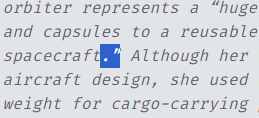
<div class="alert alert-block alert-warning"> 
<b>Коментар до завдання:</b><br>
Цей маленький нюанс в тексті завдання зіпсував трохи нервів: <br>
<i><b>sentences = sent_tokenize(text)</b></i> помилково об'єднує два речення - №13 та №14, <br>
в той час як <i><b>sentence_tokens = [sent for sent in doc.sents]</b></i> працює коректно <br>
мае бути так: <b>".</b> (крапка після лапки)<br>
після виправлення в тексті все працює правильно </div>


In [2036]:
# відсоток речень для summary виставляємо тут
percentage = 20

In [2037]:
# ! pip install -U pip setuptools wheel
# ! pip install -U spacy
# ! python -m spacy download en_core_web_sm

In [2038]:
import matplotlib.pyplot as plt
import spacy
import nltk
from heapq import nlargest
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation


In [2039]:
nlp = spacy.load('en_core_web_sm')
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ks797\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ks797\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2040]:
# функція виводу діаграми рейтингу речень тексту
def plt_diagram(x, y, x_summary=[], y_summary=[]):

    plt.figure(figsize=(12, 6))

    bars = plt.bar(x, y, color="skyblue", label="Усі речення")

    if x_summary:
        plt.bar(
            x_summary,
            y_summary,
            width=0.7,
            color="royalblue",
            label="Summary",
        )

    for bar in bars:
        val = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            val + 0.02,
            round(val, 1),
            va="bottom",
            ha="center",
            color="blue",
        )

    plt.title("Рейтинг речень")
    plt.xlabel("Номер речення")
    plt.ylabel("Рейтинг")
    plt.xticks(x, rotation=0, ha="center", fontsize=10)
    plt.xlim(0, len(x) + 1)
    plt.legend()
    plt.show()

In [2041]:
# Токенізація
doc = nlp(text)
# tokens = [token.text for token in doc]
tokens = word_tokenize(text)
sentences = sent_tokenize(text)
stop_words = set(stopwords.words("english"))
punctuation = punctuation + "\n"

In [2042]:
# частота появи кожного з слів у тексті
word_frequencies = {}

for word in doc:
    if word.text.lower() not in stop_words:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

# максимальна частота серед усіх слів
max_frequency = max(word_frequencies.values())

# нормалізація
for word in word_frequencies:
    word_frequencies[word] = word_frequencies[word] / max_frequency

In [2043]:
# creates a list of sentence tokens by iterating over the sentences in the doc object.
# doc.sents is an iterable of sentence spans in the document.
# Each sentence is extracted and stored in the sentence_tokens list.
sentence_tokens = [sent for sent in doc.sents]

In [2044]:
# знаходимо рейтинг кожного речення як суму рейтингів слів цього речення
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies:
            if sent not in sentence_scores:
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

In [2045]:
# дані для діаграми
scores_for_plt = {
    k + 1: round(v, 2) for k, (key, v) in enumerate(sentence_scores.items())
}
# номер речення
x = list(scores_for_plt.keys())
# рейтинг речення
y = list(scores_for_plt.values())

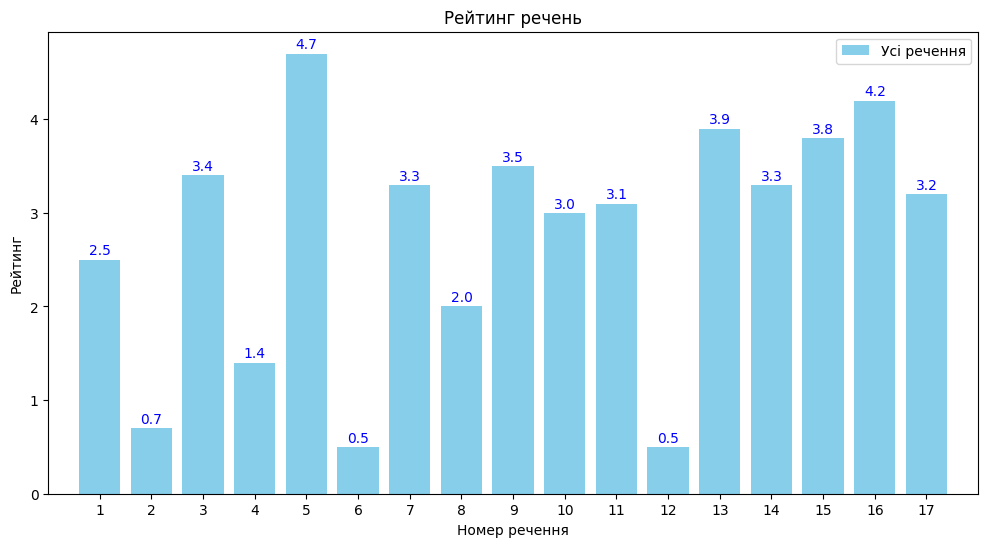

In [2046]:
plt_diagram(x, y)

<div class="alert alert-block alert-info">
<p>візуально можемо бачити, що найбільший рейтинг мають речення №№ 5, 16, 13,...<br> 
далі отримаємо такий результат програмно</p>
</div>

In [2047]:
summary_length = int(len(sentence_tokens) * (percentage * 0.01))

summary = nlargest(summary_length, sentence_scores, key=sentence_scores.get)

# конвертуємо summary в рядок (string)
final_summary = [word.text for word in summary]
# кожне речення з нової строки - для наочності
summary = "\n".join(final_summary)

# print(summary)

In [2048]:
# дані для діаграми №2
x_summary = [i + 1 for i, sentence in enumerate(sentences) if sentence in summary]
y_summary = [y[i - 1] for i in x if i in x_summary]

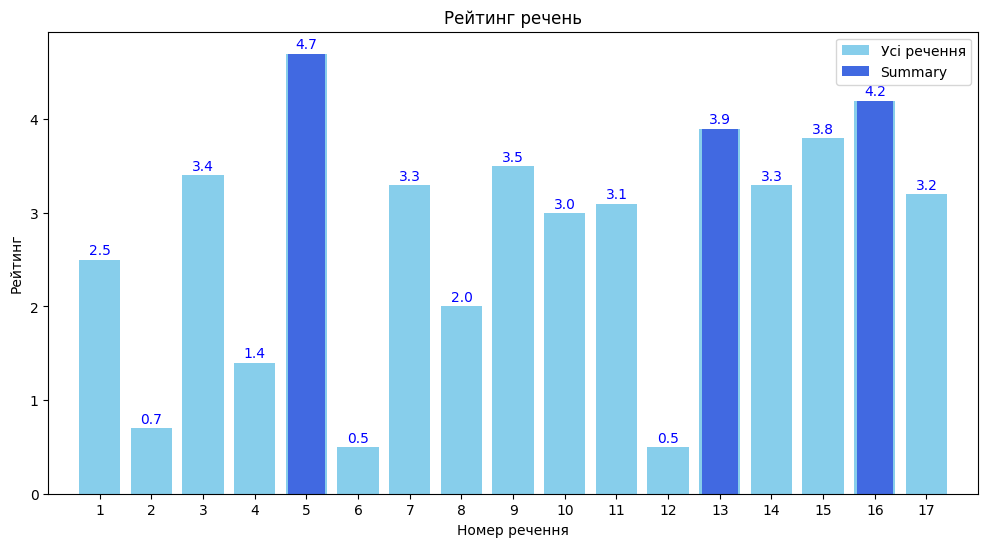

In [2049]:
plt_diagram(x, y, x_summary, y_summary)

In [2050]:
print(f"\033[33m{summary} \033[0m")

Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions.
Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System.
According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft”. 


<div class="alert alert-block alert-info">

#### **Висновки:**
##### Зроблено summary запропонованого тексту з використанням бібліотеки для NLP: nltk та SpaCy<br>Кількість речень в summary змінюється в залежності від параметру 'percentage'<br>За умови percentage = 20, резюме виглядає так:<br>
##### <i>Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. <br>Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. <br>According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft”.</i>
</div>